In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import json
from sklearn import datasets
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [38]:
jakes_data_csv = "20-sample.csv"
data = pd.read_csv(jakes_data_csv)
data.head()

,title,tech,is_winner,likes,members,Unnamed: 5
0,racket.js,['javascript'],False,0,"['namansood', 'padamchopra']",NaN
1,Fun Cat Quiz!,['c++'],False,0,"['laythal-hellawi', 'chenchai']",https://challengepost-s3-challengepost.netdna-...
2,Interactive venue,"['particle', 'c++', 'juce', 'osc', 'l-isa', 'j...",False,0,"['adriamcassorla', 'yazsound', 'chrisearnshaw'...",NaN
3,Mathematical Sequence Analysis/Experimentation,['java'],False,0,"['shreyan-das', 'chiefvishpat']",https://challengepost-s3-challengepost.netdna-...
4,Weatherbet,NaN,False,1,"['99christina', 'munsterberg']",https://challengepost-s3-challengepost.netdna-...


In [40]:
'''
res = pd.DataFrame(columns=('list', 'no'))
res = res.set_value(0,'list',"1,2,3")
res = res.set_value(0,'no', 1)
res = res.set_value(1,'list',"2,3")
res = res.set_value(1,'no', 4)

res
'''


'\nres = pd.DataFrame(columns=(\'list\', \'no\'))\nres = res.set_value(0,\'list\',"1,2,3")\nres = res.set_value(0,\'no\', 1)\nres = res.set_value(1,\'list\',"2,3")\nres = res.set_value(1,\'no\', 4)\n\nres\n'

In [58]:
lists = []
master = []
for i  in data['tech']:
    try:
        lists.append(eval(i))
    except:
        continue

for l in lists:
    for tech in l:
        master.append(tech)
print(master)

techs = {}
for tech in master:
    if tech not in techs: 
        techs[tech] = 1
    else:
        techs[tech] += 1
techs

['javascript', 'c++', 'particle', 'c++', 'juce', 'osc', 'l-isa', 'javascript', 'maya', 'java', 'godot', 'leap-motion', 'php', "africa's-talking", 'mysql', 'java', 'python', 'html', 'css', 'python', 'flask', 'node.js', 'python', 'mongodb', 'machine-learning', 'crypto', 'google-cloud', 'particle', 'ar', 'javascript', 'html', 'css', 'arduino', 'raspberry-pi', 'python', 'html', 'css', 'java', 'xcode']


{"africa's-talking": 1,
 'ar': 1,
 'arduino': 1,
 'c++': 2,
 'crypto': 1,
 'css': 3,
 'flask': 1,
 'godot': 1,
 'google-cloud': 1,
 'html': 3,
 'java': 3,
 'javascript': 3,
 'juce': 1,
 'l-isa': 1,
 'leap-motion': 1,
 'machine-learning': 1,
 'maya': 1,
 'mongodb': 1,
 'mysql': 1,
 'node.js': 1,
 'osc': 1,
 'particle': 2,
 'php': 1,
 'python': 4,
 'raspberry-pi': 1,
 'xcode': 1}

([<matplotlib.axis.XTick at 0x2697c509080>,
 <a list of 26 Text xticklabel objects>)

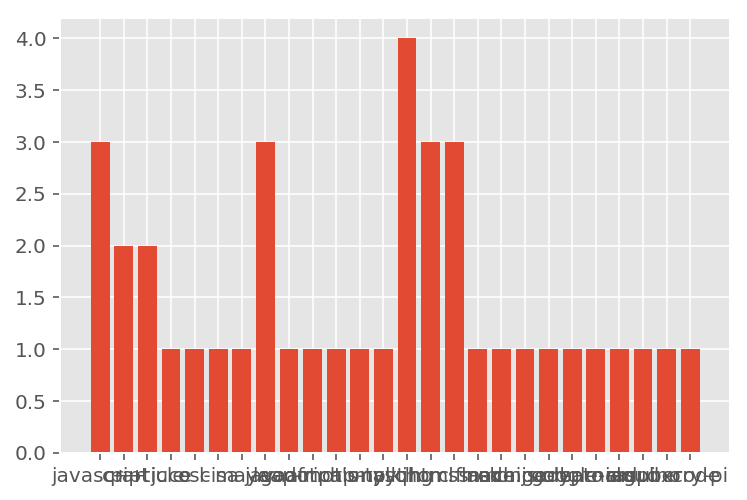

In [59]:
plt.bar(range(len(techs)), list(techs.values()), align='center')
plt.xticks(range(len(techs)), list(techs.keys()))